# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import datetime
from sklearn.ensemble import RandomForestRegressor

# Load the Dataset

In [2]:
data = pd.read_csv('C:\\Users\\MUDIT JAIN\\Desktop\\data\\TCS_stock_history.csv') 
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values(by='Date', inplace=True)
data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0


# Check for missing and null value

In [3]:
print(data.isnull().sum())


Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


# Convert numeric columns if required

In [4]:
data['Open'] = pd.to_numeric(data['Open'], errors='coerce')
data['High'] = pd.to_numeric(data['High'], errors='coerce')
data['Low'] = pd.to_numeric(data['Low'], errors='coerce')
data['Close'] = pd.to_numeric(data['Close'], errors='coerce')


In [5]:
print(data)

           Date         Open         High          Low        Close   Volume  \
0    2002-08-12    28.794172    29.742206    28.794172    29.519140   212976   
1    2002-08-13    29.556316    30.030333    28.905705    29.119476   153576   
2    2002-08-14    29.184536    29.184536    26.563503    27.111877   822776   
3    2002-08-15    27.111877    27.111877    27.111877    27.111877        0   
4    2002-08-16    26.972458    28.255089    26.582090    27.046812   811856   
...         ...          ...          ...          ...          ...      ...   
4458 2021-09-24  3890.000000  3944.399902  3855.000000  3871.300049  2320754   
4459 2021-09-27  3900.000000  3904.000000  3802.899902  3836.949951  1673362   
4460 2021-09-28  3850.000000  3850.000000  3751.250000  3779.149902  2253075   
4461 2021-09-29  3759.800049  3806.000000  3722.149902  3791.899902  2489161   
4462 2021-09-30  3805.000000  3805.000000  3765.000000  3773.199951   640479   

      Dividends  Stock Splits  
0      

# Fill any remaining NaN values


In [6]:
data.fillna(method='ffill', inplace=True)

C:\Users\MUDIT JAIN\AppData\Local\Temp\ipykernel_1716\2866031220.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [7]:
data.ffill()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0
...,...,...,...,...,...,...,...,...
4458,2021-09-24,3890.000000,3944.399902,3855.000000,3871.300049,2320754,0.0,0.0
4459,2021-09-27,3900.000000,3904.000000,3802.899902,3836.949951,1673362,0.0,0.0
4460,2021-09-28,3850.000000,3850.000000,3751.250000,3779.149902,2253075,0.0,0.0
4461,2021-09-29,3759.800049,3806.000000,3722.149902,3791.899902,2489161,0.0,0.0


# Plotting Close price over time


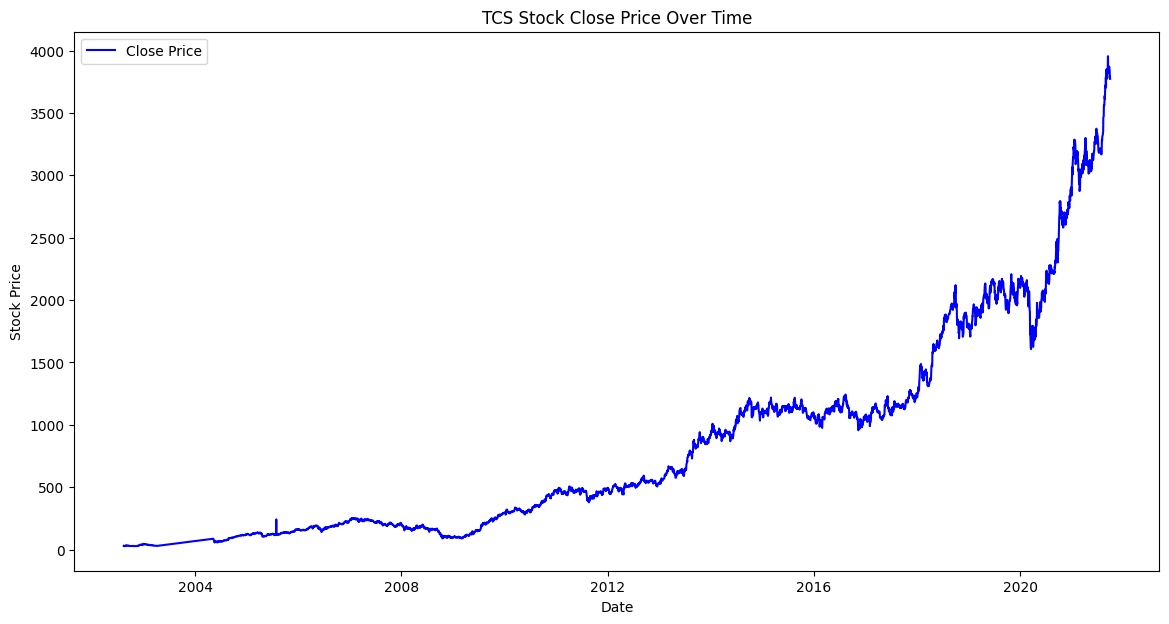

In [8]:
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], color='blue',
label='Close Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('TCS Stock Close Price Over Time')
plt.legend()
plt.show()


# Plotting open price over time


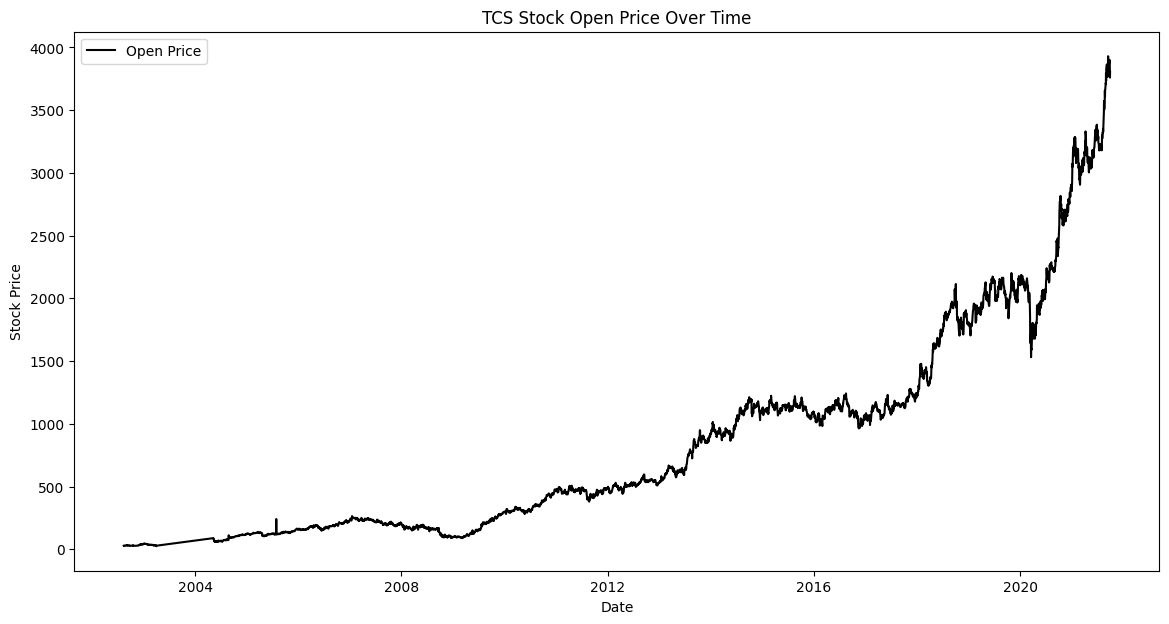

In [9]:
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Open'], color='black',
label='Open Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('TCS Stock Open Price Over Time')
plt.legend()
plt.show()


# Plotting High price over time


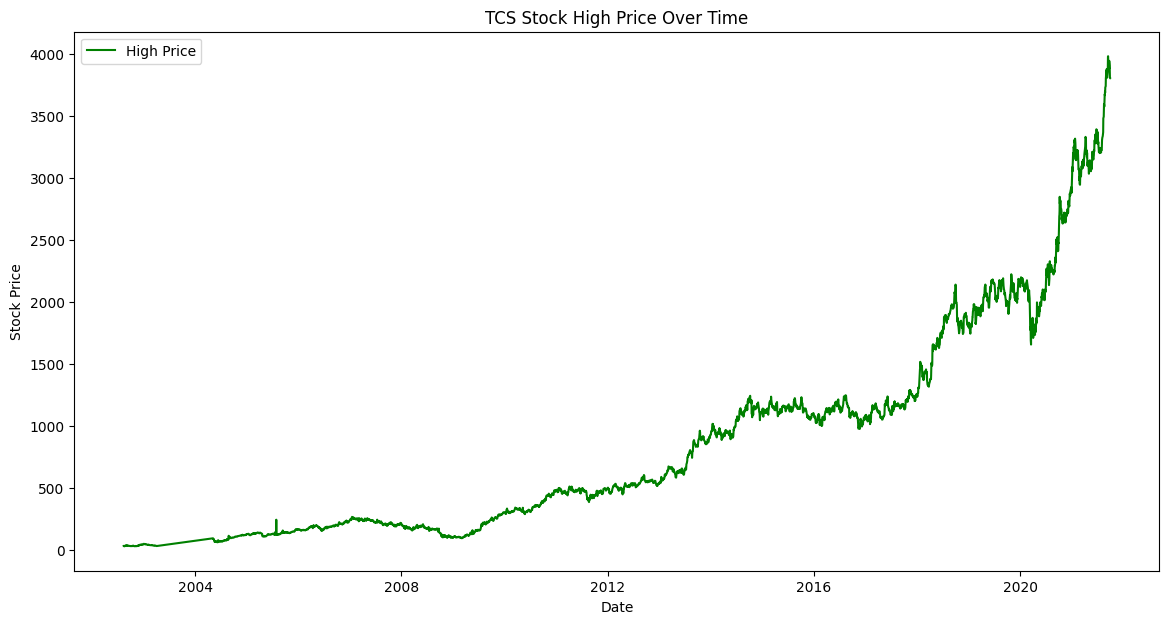

In [10]:
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['High'], color='green',
label='High Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('TCS Stock High Price Over Time')
plt.legend()
plt.show()

# Plotting Low price over time


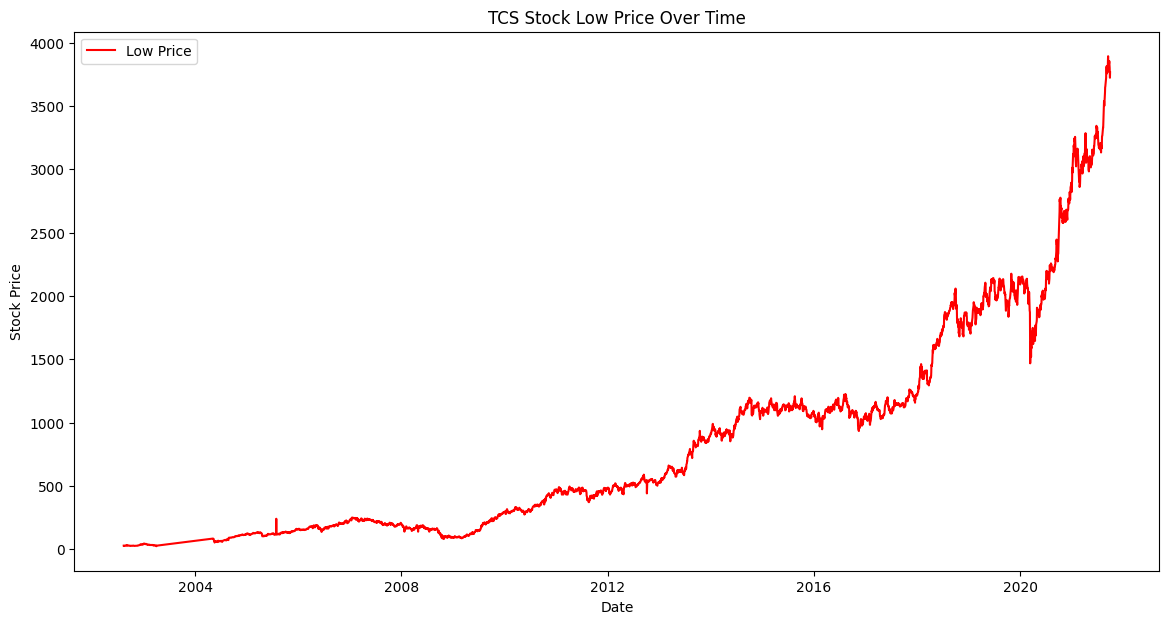

In [11]:
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Low'], color='red',
label='Low Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('TCS Stock Low Price Over Time')
plt.legend()
plt.show()

# Calculating 50-day and 200-day moving averages


In [12]:
data['MA50'] = data['Close'].rolling(window=50).mean()
data['MA200'] = data['Close'].rolling(window=200).mean()


# Plot with Moving Averages

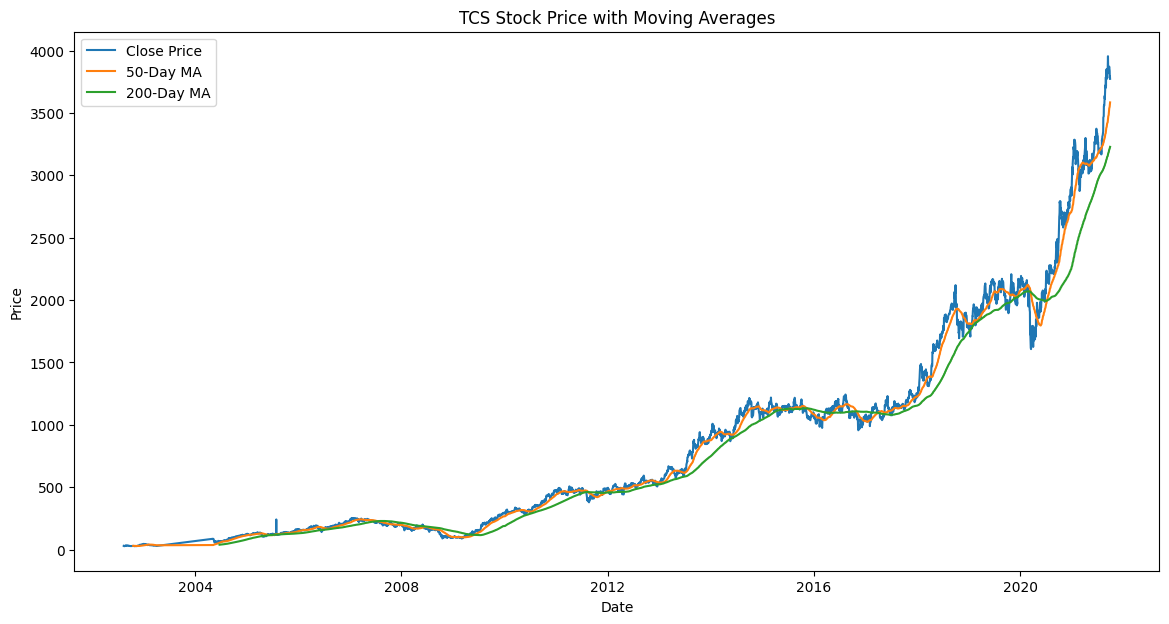

In [13]:
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], label='Close Price')
plt.plot(data['Date'], data['MA50'], label='50-Day MA')
plt.plot(data['Date'], data['MA200'], label='200-Day MA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('TCS Stock Price with Moving Averages')
plt.legend()
plt.show()


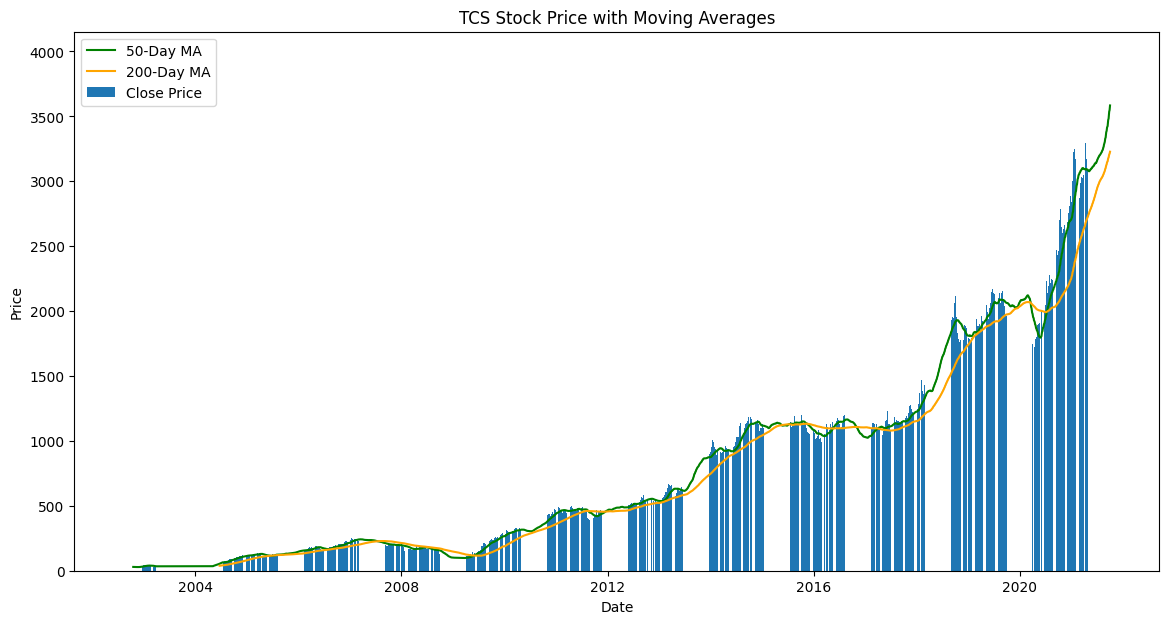

In [14]:
plt.figure(figsize=(14, 7))
plt.bar(data['Date'], data['Close'], label='Close Price')
plt.plot(data['Date'], data['MA50'], label='50-Day MA',color='green')
plt.plot(data['Date'], data['MA200'], label='200-Day MA',color='orange')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('TCS Stock Price with Moving Averages')
plt.legend()
plt.show()


# Feature Engineering

In [15]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Day_of_Week'] = data['Date'].dt.dayofweek


In [16]:
data['Prev_Close'] = data['Close'].shift(1)
data.dropna(inplace=True)

# Visualization of closing price 

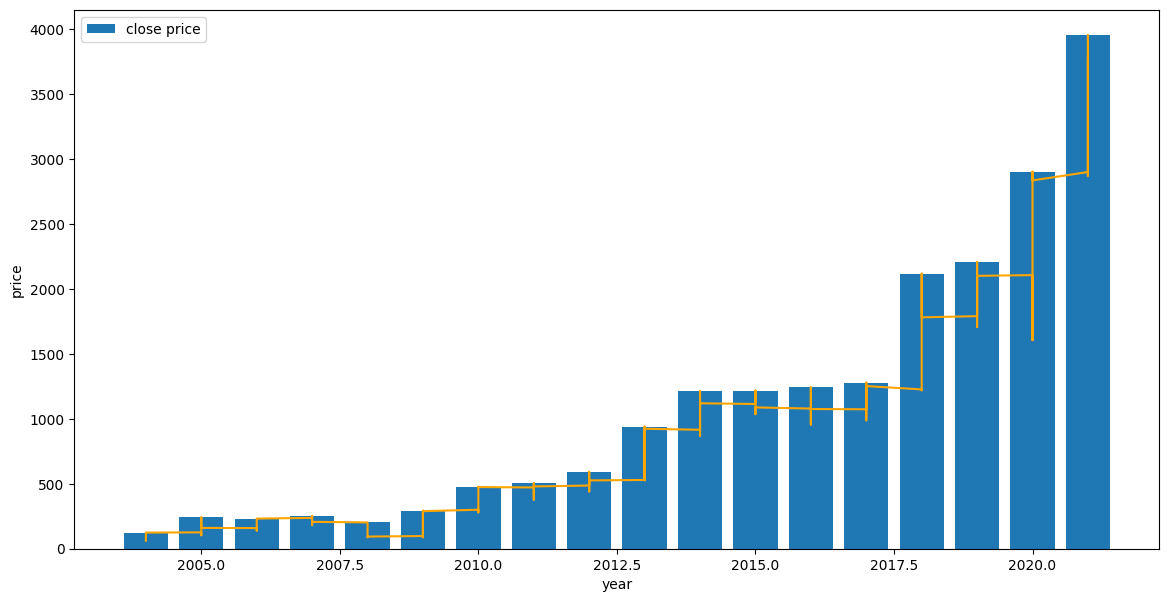

In [17]:
plt.figure(figsize=(14, 7))
plt.bar(data['Year'],data['Close'],label='close price')
plt.plot(data['Year'],data['Close'],color='orange')
plt.xlabel('year')
plt.ylabel('price')
plt.legend()
plt.show()


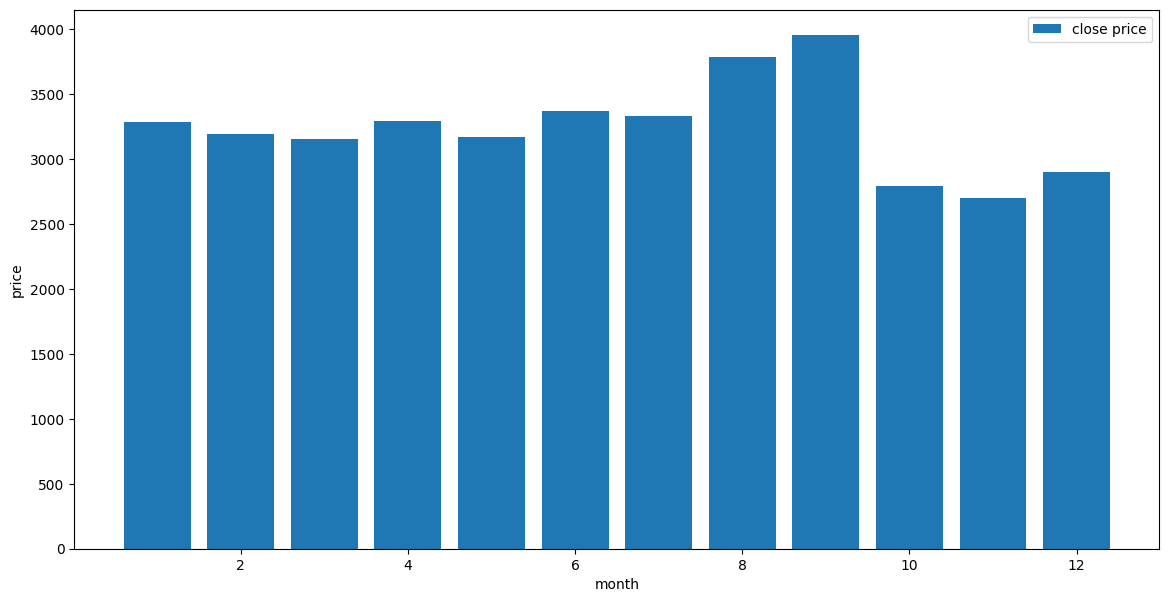

In [18]:
plt.figure(figsize=(14, 7))
plt.bar(data['Month'],data['Close'],label='close price')
plt.xlabel('month')
plt.ylabel('price')
plt.legend()
plt.show()

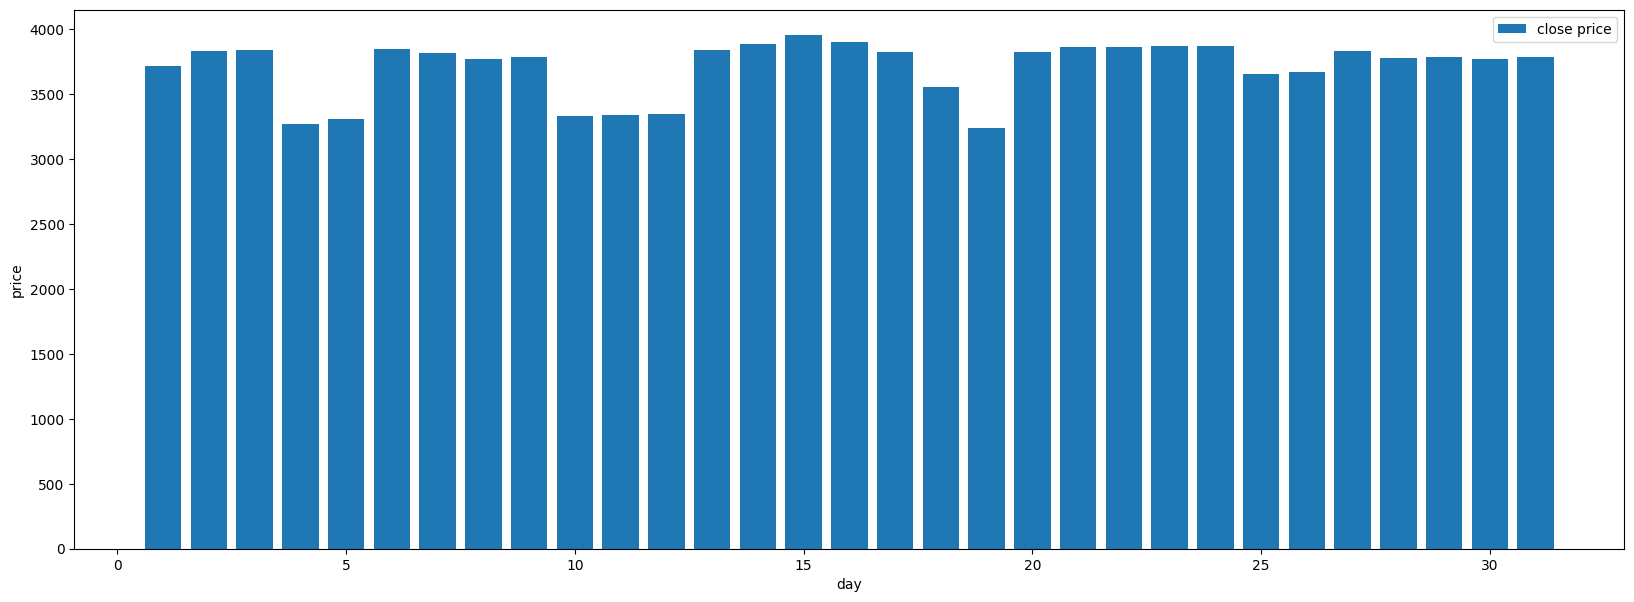

In [19]:
plt.figure(figsize=(20,7))
plt.bar(data['Day'],data['Close'],label='close price')
plt.xlabel('day')
plt.ylabel('price')
plt.legend()
plt.show()

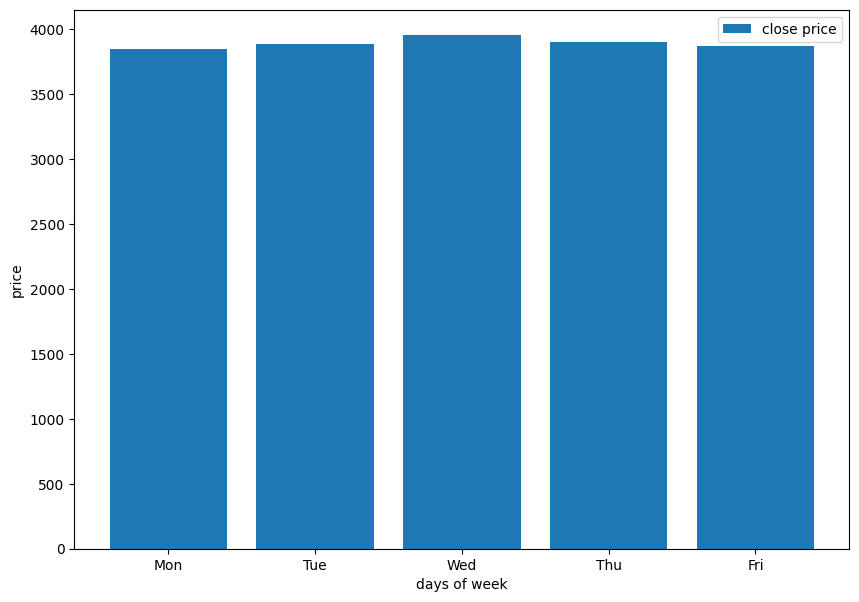

In [20]:
plt.figure(figsize=(10,7))
plt.bar(data['Day_of_Week'],data['Close'],label='close price')
plt.xticks(ticks=range(5), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri'])
plt.xlabel('days of week')
plt.ylabel('price')
plt.legend()
plt.show()

# Feature selection and split into train and test the close data

In [21]:
x = data[['Open', 'High', 'Low', 'Volume', 'Prev_Close',
'Day_of_Week', 'Month']]
y = data['Close']


In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=42)

# Linear Regression Model Predictions and evaluation

In [23]:

lr = LinearRegression()
lr.fit(x_train, y_train)


LinearRegression()

In [24]:

y_pred = lr.predict(x_test)
lr.score(x_test,y_test)


0.9999438356582184

In [25]:

print("Mean Squared Error:", mean_squared_error(y_test,
y_pred))
print("R-Squared Score:", r2_score(y_test, y_pred))

Mean Squared Error: 39.049929985802855
R-Squared Score: 0.9999438356582184


# Visualize Model Performance


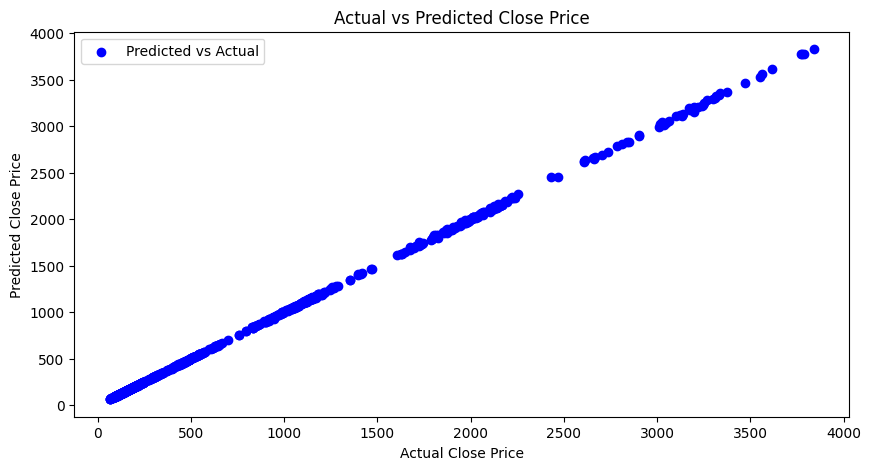

In [26]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.title('Actual vs Predicted Close Price')
plt.legend()
plt.show()


# Random forest Regressor Model Predictions and evaluation

In [27]:
rfr = RandomForestRegressor(random_state=42)
rfr.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [28]:
y_pred = rfr.predict(x_test)
rfr.score(x_test,y_test)

0.9998582028952974

In [29]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 98.58865670255221
R^2 Score: 0.9998582028952974


# Visualize Model Performance

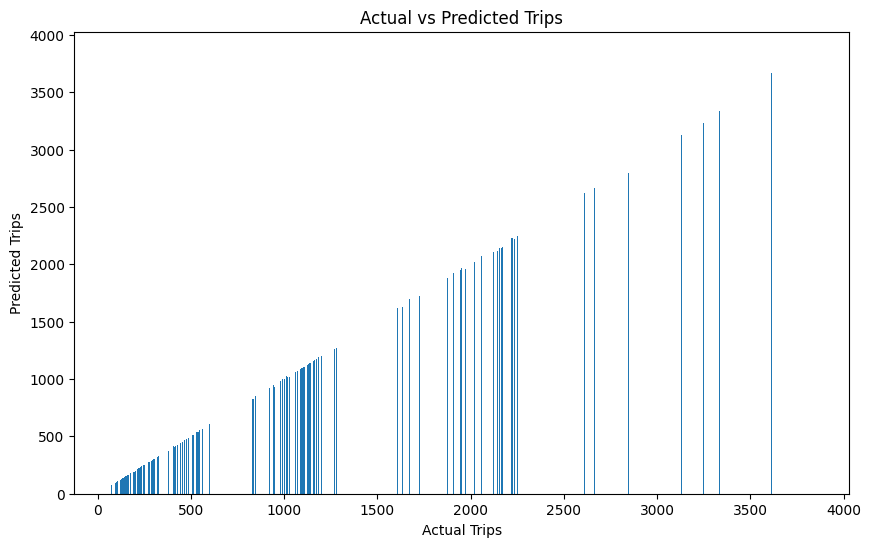

In [30]:
plt.figure(figsize=(10,6))
plt.bar(y_test, y_pred)
plt.xlabel('Actual Trips')
plt.ylabel('Predicted Trips')
plt.title('Actual vs Predicted Trips')
plt.show()

# Feature selection and split into train and test the close data

In [31]:
x = data[['Open', 'High', 'Low', 'Volume', 'Prev_Close',
'Day_of_Week', 'Month']]
y = data['Open']


In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=42)

# Linear Regression Model Predictions and evaluation

In [33]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [34]:
y_pred = model.predict(x_test)
lr.score(x_test,y_test)

0.9996630536064616

In [35]:
print("Mean Squared Error:", mean_squared_error(y_test,
y_pred))
print("R-Squared Score:", r2_score(y_test, y_pred))

Mean Squared Error: 7.014111813293153e-20
R-Squared Score: 1.0


# Visualize Model Performance

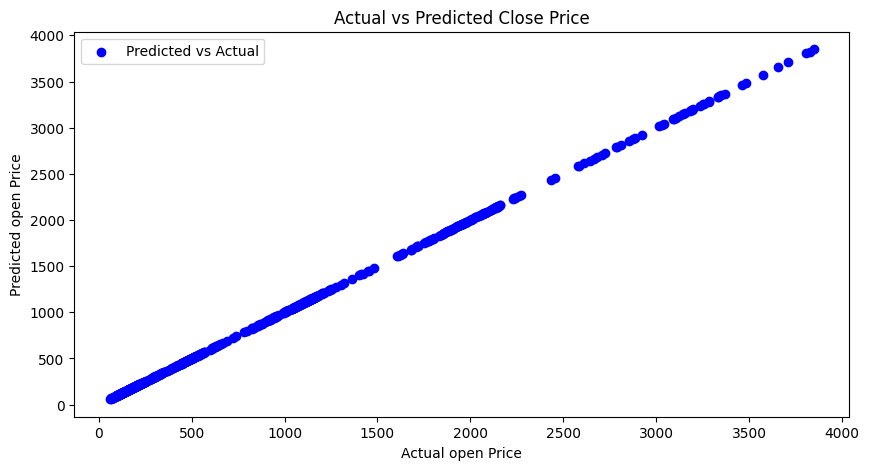

In [36]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.xlabel('Actual open Price')
plt.ylabel('Predicted open Price')
plt.title('Actual vs Predicted Close Price')
plt.legend()
plt.show()

# Random forest Regressor Model Predictions and evaluation

In [37]:
rf = RandomForestRegressor(random_state=42)
rf.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [38]:
y_pred = rf.predict(x_test)
rf.score(x_test,y_test)

0.9999873012570591

In [39]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 8.836515135219404
R^2 Score: 0.9999873012570591


# Visualize Model Performance

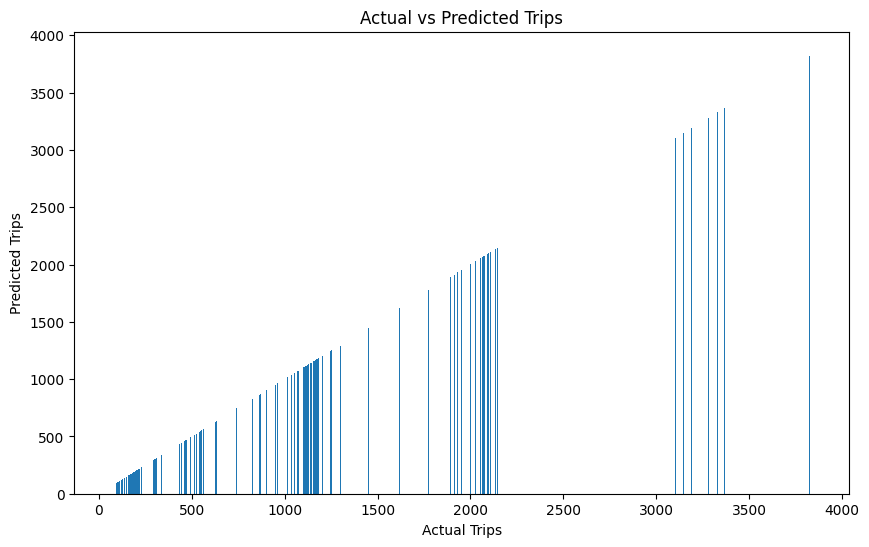

In [40]:
plt.figure(figsize=(10,6))
plt.bar(y_test, y_pred)
plt.xlabel('Actual Trips')
plt.ylabel('Predicted Trips')
plt.title('Actual vs Predicted Trips')
plt.show()